In [46]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image
from pathlib import Path

In [82]:
PART = 'train'

PATH = Path('semeval-2023-task-1-V-WSD-train-v1').resolve() / f"{PART}_v1"
PATH

WindowsPath('D:/ноука/semeval-2023-task-1-V-WSD-train-v1/semeval-2023-task-1-V-WSD-train-v1/train_v1')

In [83]:
data = pd.read_csv(PATH / f"{PART}.data.v1.txt", sep='\t', header=None)
data.columns = ['word', 'context'] + [f'image{i}' for i in range(10)]
data2 = pd.read_csv(PATH / f"{PART}.gold.v1.txt", sep='\t', header=None)
data['image_gold'] = data2
data

word             context           image0          image1  \
0          moorhen    moorhen swamphen      image.3.jpg     image.8.jpg   
1          serinus       serinus genus      image.3.jpg    image.23.jpg   
2        pegmatite   pegmatite igneous     image.41.jpg    image.39.jpg   
3       bangalores  bangalores torpedo     image.58.jpg    image.59.jpg   
4           bonxie         bonxie skua      image.3.jpg    image.77.jpg   
...            ...                 ...              ...             ...   
12864      bomarea       bomarea genus  image.11820.jpg     image.3.jpg   
12865   tragopogon    tragopogon genus      image.3.jpg  image.6250.jpg   
12866  illustrator  illustrator artist  image.10633.jpg   image.723.jpg   
12867   brunfelsia    brunfelsia genus      image.3.jpg  image.8911.jpg   
12868     headband       headband band    image.340.jpg  image.7485.jpg   

                image2           image3           image4           image5  \
0          image.4.jpg      image.1.jpg      image.2.jpg      image.0.jpg   
1          image.4.jpg      image.1.jpg      image.2.jpg     image.20.jpg   
2         image.42.jpg     image.43.jpg     image.40.jpg     image.44.jpg   
3         image.64.jpg     image.57.jpg     image.55.jpg     image.56.jpg   
4         image.78.jpg      image.4.jpg      image.1.jpg      image.2.jpg   
...                ...              ...              ...              ...   
12864      image.4.jpg      image.1.jpg      image.2.jpg   image.1559.jpg   
12865  image.15001.jpg      image.4.jpg      image.1.jpg      image.2.jpg   
12866  image.13372.jpg    image.881.jpg  image.12635.jpg    image.726.jpg   
12867   image.5195.jpg      image.4.jpg  image.12827.jpg      image.1.jpg   
12868   image.8747.jpg  image.12401.jpg    image.343.jpg  image.12122.jpg   

                image6          image7          image8           image9  \
0          image.5.jpg     image.6.jpg     image.7.jpg      image.9.jpg   
1          image.5.jpg    image.24.jpg    image.22.jpg     image.21.jpg   
2         image.37.jpg    image.38.jpg    image.36.jpg     image.35.jpg   
3         image.62.jpg    image.63.jpg    image.61.jpg     image.60.jpg   
4          image.5.jpg    image.79.jpg    image.76.jpg     image.75.jpg   
...                ...             ...             ...              ...   
12864   image.1285.jpg     image.5.jpg  image.6482.jpg  image.10937.jpg   
12865  image.12074.jpg     image.5.jpg  image.4087.jpg  image.12806.jpg   
12866   image.5985.jpg   image.722.jpg   image.724.jpg    image.725.jpg   
12867      image.2.jpg     image.5.jpg  image.9129.jpg   image.8605.jpg   
12868    image.344.jpg  image.8501.jpg   image.342.jpg   image.4550.jpg   

            image_gold  
0          image.0.jpg  
1         image.20.jpg  
2         image.35.jpg  
3         image.55.jpg  
4         image.75.jpg  
...                ...  
12864  image.11820.jpg  
12865  image.12074.jpg  
12866  image.10633.jpg  
12867   image.8911.jpg  
12868   image.8747.jpg  

[12869 rows x 13 columns]

7889


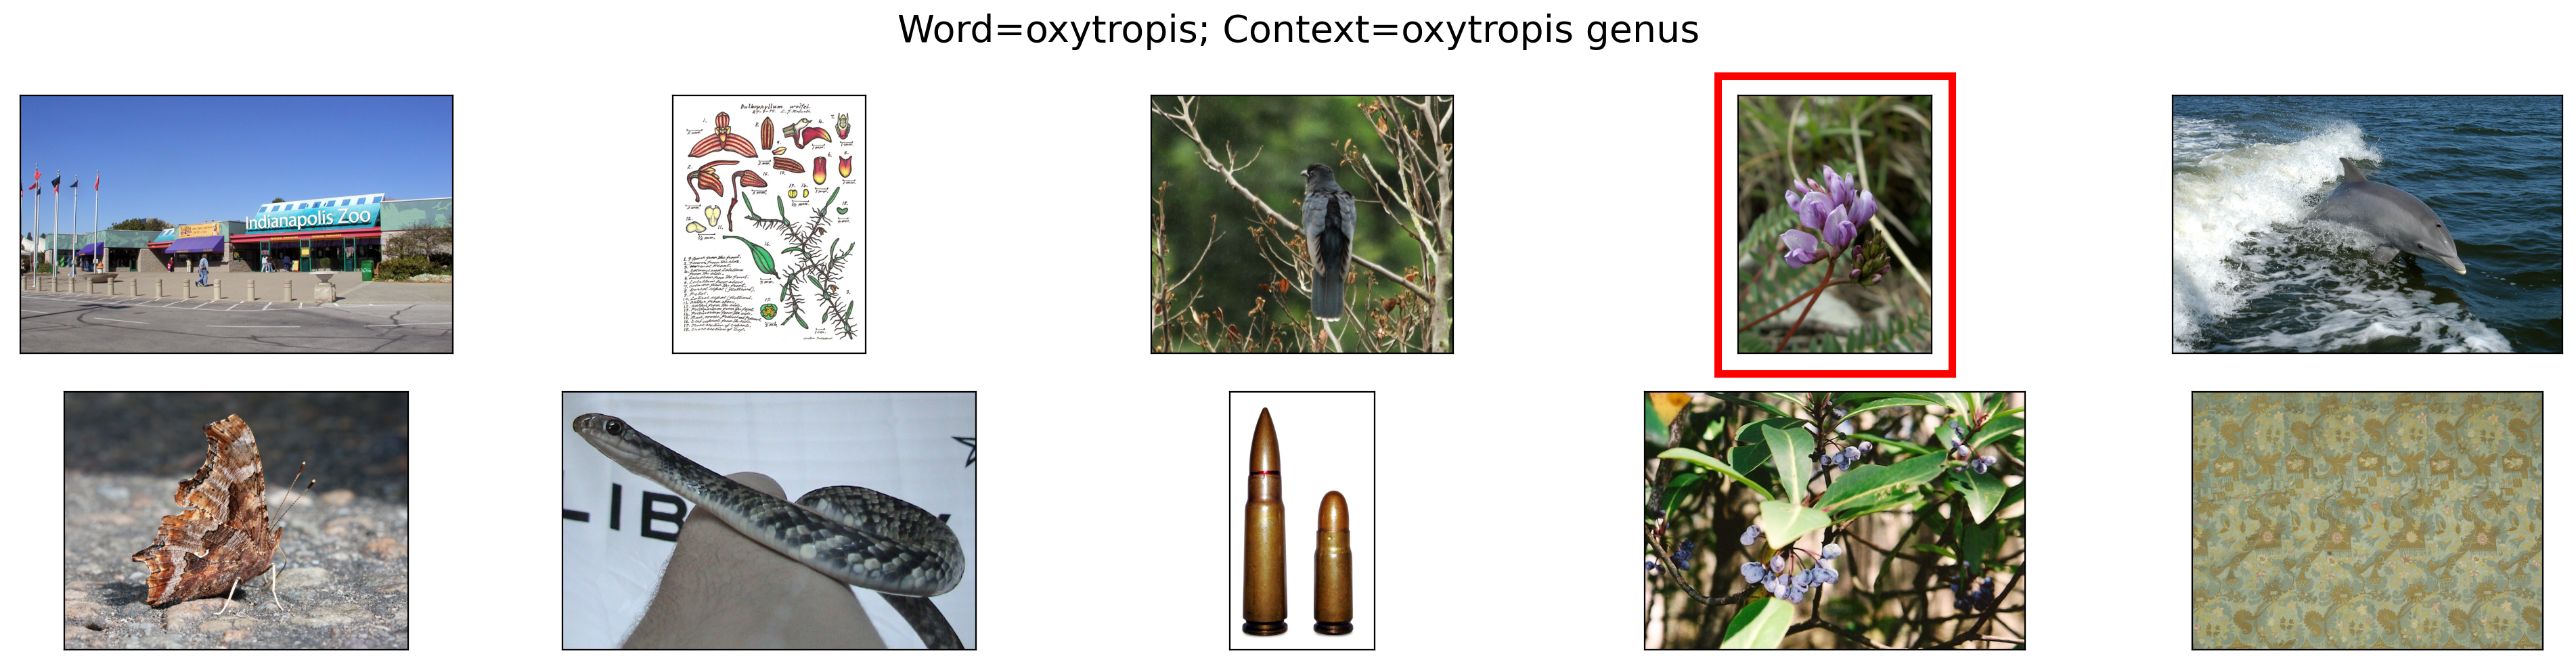

In [73]:
def visualize_row(row):
    fig, ax = plt.subplots(2, 5, figsize=(20, 5), dpi=200)
    golden = row['image_gold']
    for i in range(10):
        col = f'image{i}'
        filename = PATH / f'{PART}_images_v1' / row[col]
        img = Image.open(filename)
        img = np.array(img)
        ax[i % 2, i // 2].imshow(img)
        ax[i % 2, i // 2].set_xticks([])
        ax[i % 2, i // 2].set_yticks([])
        if row[col] == golden:
            ax[i % 2, i // 2].add_patch(patches.Rectangle((-200,-200), img.shape[1] + 400, img.shape[0] + 400, edgecolor='red', facecolor='none', linewidth = 4, clip_on=False))
    
    fig.suptitle(f"Word={row['word']}; Context={row['context']}", fontsize=20)
    fig.tight_layout()


row = data.sample(1, random_state=41).iloc[0]
print(row.name)
visualize_row(row)

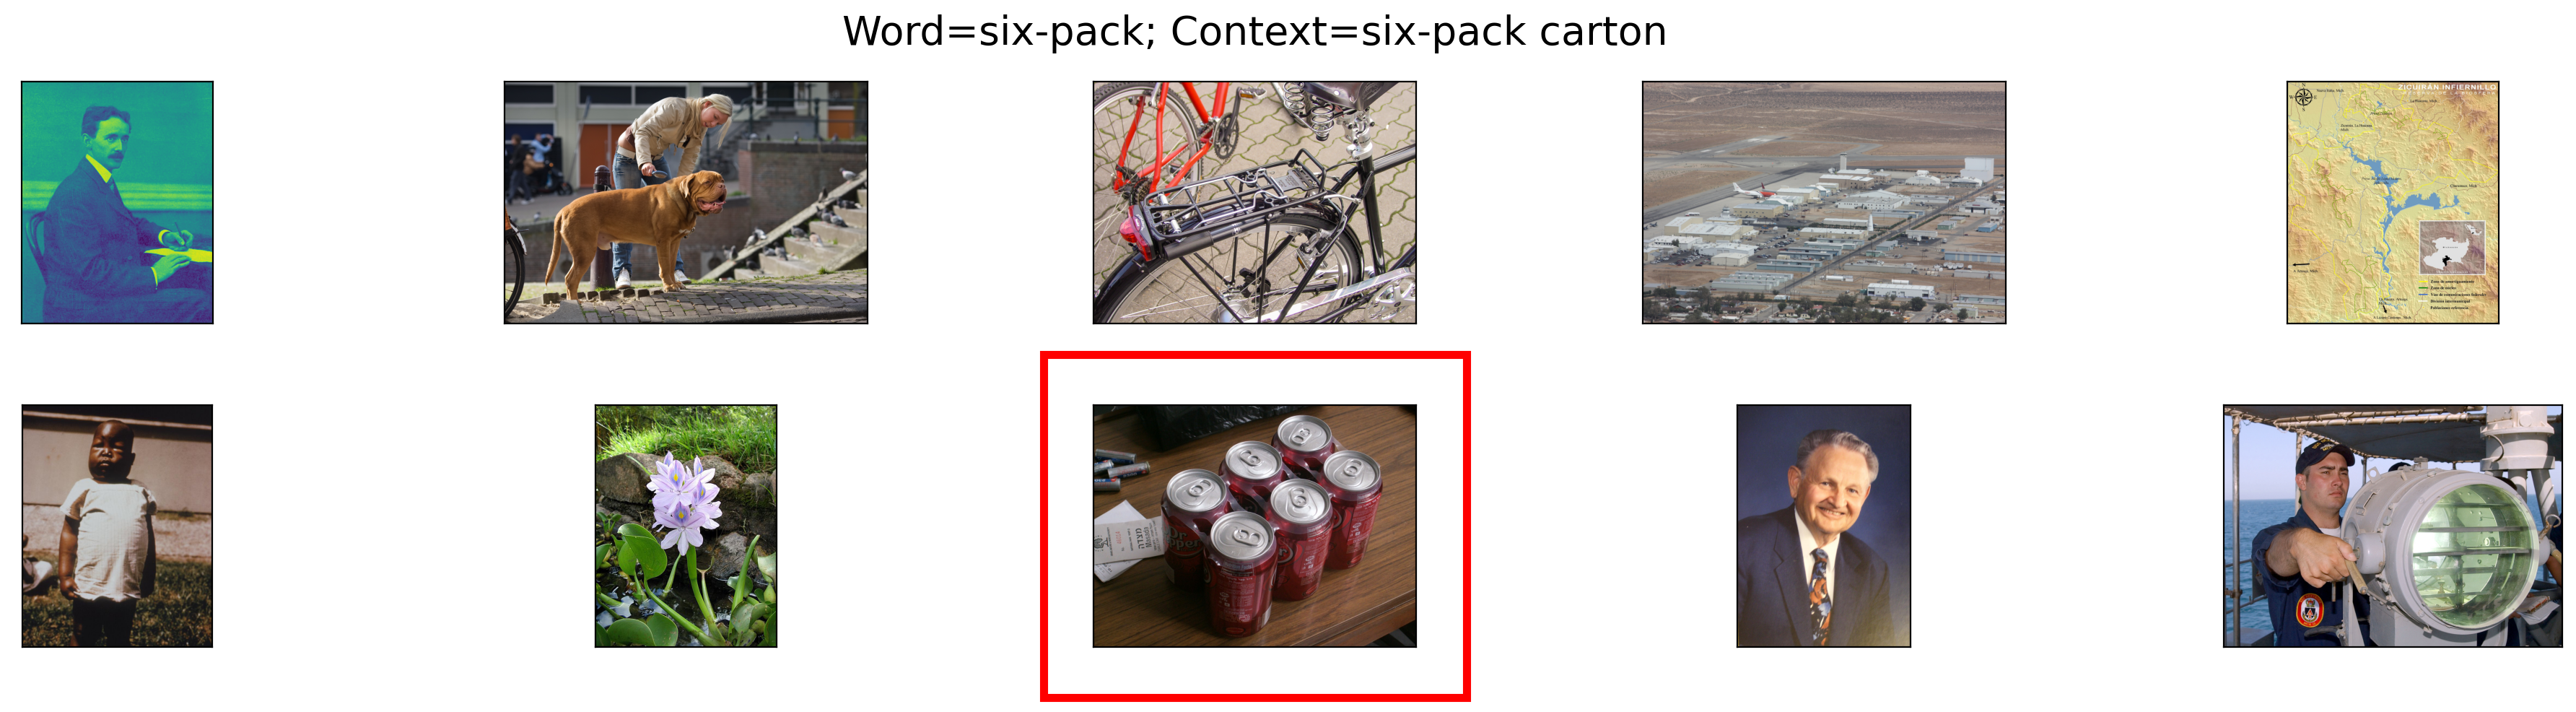

In [79]:

visualize_row(data.loc[6378, :])

In [86]:
data.context.apply(lambda x: len(x.split(' '))).value_counts()

2    12869
Name: context, dtype: int64

In [91]:
data.context.nunique()

12840

In [96]:
data[['word', 'context']].sample(25, random_state=41)

word                            context
7889            oxytropis                    oxytropis genus
10148            myopathy                 myopathy pathology
5369          balloonvine                   balloonvine vine
939              tapiriba                 tapiriba fruittree
6064             jealousy                      jealousy envy
7705    metal-detectorist           metal-detectorist sensor
8401            colorcast                colorcast tv-series
1373              amsonia                      amsonia genus
5373              raoulia                      raoulia genus
10721             pinfish                     pinfish sparid
8143            digitaria                    digitaria genus
7957                  rim                           rim hoop
6691              basenji                        basenji dog
2401            tree-fern                     tree-fern fern
3395             bandtail                    bandtail pigeon
8383            oecanthus                    oecanthus genus
5563   disproportionality  disproportionality representation
1417          kinetoscope                 kinetoscope device
7490                cross                         cross fold
751               hafnium                      hafnium metal
10560           blue-bill                 blue-bill bluebill
2179                group                          group set
11650                tart                           tart pie
10812             inkwell                       inkwell well
210               seppuku                    seppuku suicide